<a href="https://colab.research.google.com/github/junnu01/Unsupervised-Algorithms-in-ML/blob/main/Unsupervised_ALGORITHMS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

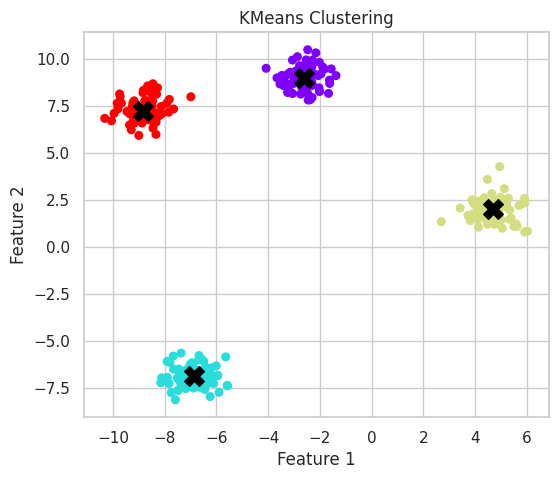

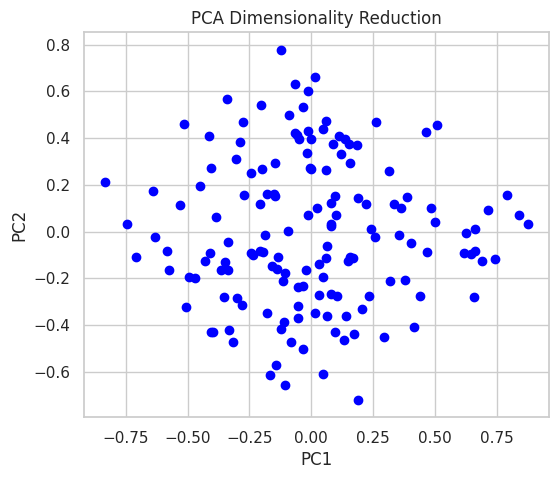

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


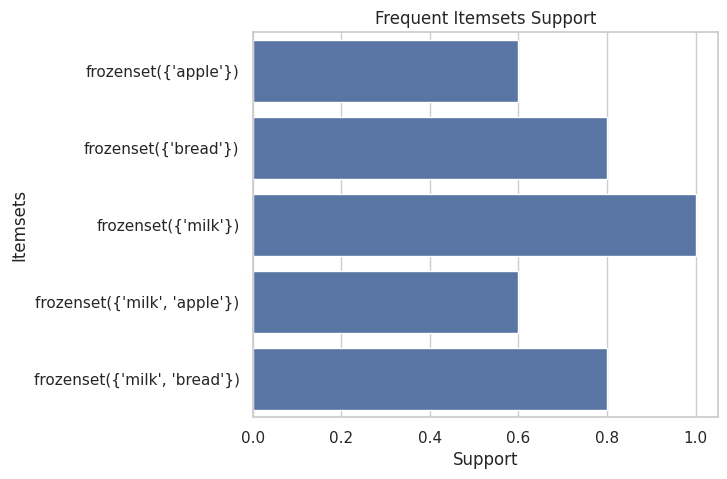


📊 ALGORITHM PERFORMANCE SUMMARY:

🔹 KMeans - Silhouette Score: 0.88, Time: 0.1286 sec
🔹 PCA - Time: 0.0161 sec
🔹 Apriori - Time: 0.0275 sec

🧠 Association Rules Generated:
  antecedents consequents  support  confidence  lift
0     (apple)      (milk)      0.6         1.0   1.0
1      (milk)     (bread)      0.8         0.8   1.0
2     (bread)      (milk)      0.8         1.0   1.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

sns.set(style="whitegrid")

# -------- Generate Synthetic Unlabeled Dataset --------
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# -------- KMeans Clustering --------
start_kmeans = time.time()
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
kmeans_time = time.time() - start_kmeans

# Accuracy Metric (Silhouette Score for unsupervised)
kmeans_score = silhouette_score(X, labels)

# -------- Visualization: KMeans --------
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# -------- PCA for Dimensionality Reduction --------
np.random.seed(42)
high_dim_data = np.random.rand(150, 5)  # 5D data

start_pca = time.time()
pca = PCA(n_components=2)
pca_data = pca.fit_transform(high_dim_data)
pca_time = time.time() - start_pca

# -------- Visualization: PCA Result --------
plt.figure(figsize=(6, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue')
plt.title("PCA Dimensionality Reduction")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# -------- Apriori Algorithm --------
transactions = [
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'bread', 'nuts', 'apple'],
    ['milk', 'bread', 'apple'],
    ['milk', 'apple']
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

start_apriori = time.time()
frequent_items = apriori(df, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.7)
apriori_time = time.time() - start_apriori

# -------- Visualization: Support of Items --------
plt.figure(figsize=(6, 5))
sns.barplot(data=frequent_items, x='support', y='itemsets')
plt.title("Frequent Itemsets Support")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

# --------- Results Summary ---------
print("\n📊 ALGORITHM PERFORMANCE SUMMARY:\n")
print(f"🔹 KMeans - Silhouette Score: {kmeans_score:.2f}, Time: {kmeans_time:.4f} sec")
print(f"🔹 PCA - Time: {pca_time:.4f} sec")
print(f"🔹 Apriori - Time: {apriori_time:.4f} sec")
print("\n🧠 Association Rules Generated:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


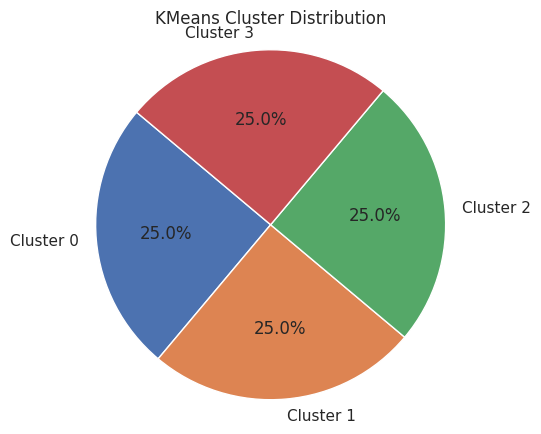

In [2]:
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6, 5))
plt.pie(counts, labels=[f"Cluster {i}" for i in unique], autopct='%1.1f%%', startangle=140)
plt.title("KMeans Cluster Distribution")
plt.axis('equal')
plt.show()

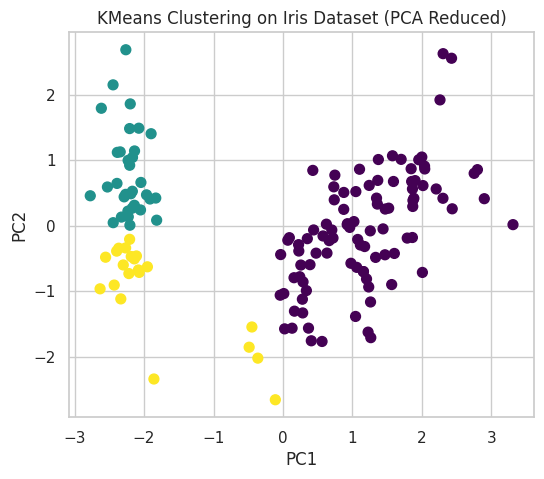

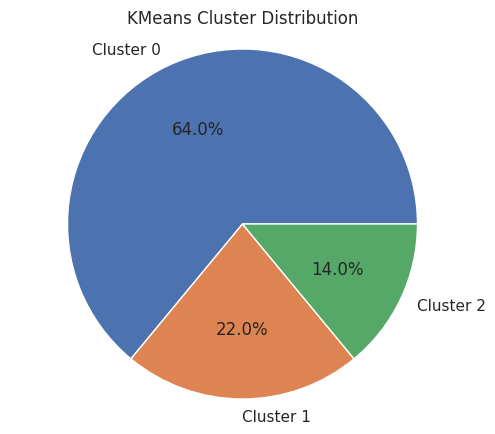

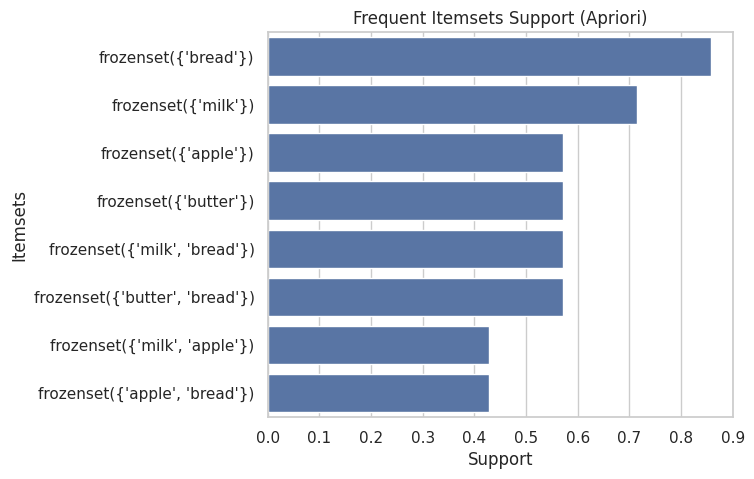


📊 ALGORITHM PERFORMANCE SUMMARY:

🔹 KMeans - Silhouette Score: 0.48, Time: 0.0133 sec
🔹 PCA - Time: 0.0012 sec
🔹 Apriori - Time: 0.0142 sec

🧠 Association Rules (Apriori):
  antecedents consequents   support  confidence      lift
0     (apple)     (bread)  0.428571    0.750000  0.875000
1      (milk)     (apple)  0.428571    0.600000  1.050000
2     (apple)      (milk)  0.428571    0.750000  1.050000
3    (butter)     (bread)  0.571429    1.000000  1.166667
4     (bread)    (butter)  0.571429    0.666667  1.166667
5      (milk)     (bread)  0.571429    0.800000  0.933333
6     (bread)      (milk)  0.571429    0.666667  0.933333


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

sns.set(style="whitegrid")

# ---------- Load Real-World Dataset: Iris ----------
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X_scaled = StandardScaler().fit_transform(X)  # Feature scaling

# ---------- KMeans Clustering ----------
start_kmeans = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
kmeans_time = time.time() - start_kmeans
kmeans_score = silhouette_score(X_scaled, labels)

# ---------- PCA for Visualization ----------
start_pca = time.time()
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
pca_time = time.time() - start_pca

# ---------- Visualization: KMeans Clusters ----------
plt.figure(figsize=(6, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering on Iris Dataset (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# ---------- Pie Chart: Cluster Distribution ----------
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6, 5))
plt.pie(counts, labels=[f"Cluster {i}" for i in unique], autopct='%1.1f%%')
plt.title("KMeans Cluster Distribution")
plt.axis('equal')
plt.show()

# ---------- Apriori on Sample Market Basket Data ----------
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter', 'apple'],
    ['bread', 'butter'],
    ['milk', 'apple'],
    ['milk', 'bread', 'apple'],
    ['bread', 'butter', 'apple'],
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_market = pd.DataFrame(te_ary, columns=te.columns_)

start_apriori = time.time()
frequent_items = apriori(df_market, min_support=0.4, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)
apriori_time = time.time() - start_apriori

# ---------- Visualization: Support of Frequent Itemsets ----------
plt.figure(figsize=(6, 5))
frequent_items_sorted = frequent_items.sort_values(by="support", ascending=False)
sns.barplot(data=frequent_items_sorted, x='support', y='itemsets')
plt.title("Frequent Itemsets Support (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

# ---------- Results Summary ----------
print("\n📊 ALGORITHM PERFORMANCE SUMMARY:\n")
print(f"🔹 KMeans - Silhouette Score: {kmeans_score:.2f}, Time: {kmeans_time:.4f} sec")
print(f"🔹 PCA - Time: {pca_time:.4f} sec")
print(f"🔹 Apriori - Time: {apriori_time:.4f} sec")

print("\n🧠 Association Rules (Apriori):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
